# Task 2 - Prediction of store sales

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
store_df = pd.read_csv("store.csv")
train_df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")

In [3]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## 2.1 Preprocessing 

In [4]:
# Converting the Date features into datetime object
train_df['Date'] = pd.to_datetime(train_df['Date'])
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [5]:
# Merging the Train and test data with Store
merged_train = pd.merge(train_df, store_df, on = "Store", how = 'left')
merged_test = pd.merge(test_df, store_df, on = "Store", how = 'left')

merged_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
# Extract year, month, day, and week of the year
merged_train['Year'] = merged_train['Date'].dt.year
merged_train['Month'] = merged_train['Date'].dt.month
merged_train['Day'] = merged_train['Date'].dt.day
merged_train['WeekOfYear'] = merged_train['Date'].dt.weekofyear

merged_test['Year'] = merged_test['Date'].dt.year
merged_test['Month'] = merged_test['Date'].dt.month
merged_test['Day'] = merged_test['Date'].dt.day
merged_test['WeekOfYear'] = merged_test['Date'].dt.weekofyear

In [7]:
merged_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [8]:
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

In [9]:
# Calculate the percentage of null values in each column
null_percentages = (merged_train.isnull().sum() / len(merged_train)) * 100
null_percentages

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Year                          0.000000
Month                         0.000000
Day                           0.000000
WeekOfYear                    0.000000
dtype: float64

In [10]:
merged_train.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
Year                              0
Month                             0
Day                               0
WeekOfYear                        0
dtype: int64

In [11]:
# No particular pattern observed. In this case, it makes a complete sense to replace NaN with the median values
merged_train['CompetitionDistance'].fillna(merged_train['CompetitionDistance'].median(), inplace = True)

### Replacing the NAN in competitionDistance since no clear pattern is observed and also there are few data points

In [12]:
merged_train.fillna(0, inplace = True)
merged_train.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Year                         0
Month                        0
Day                          0
WeekOfYear                   0
dtype: int64

In [13]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


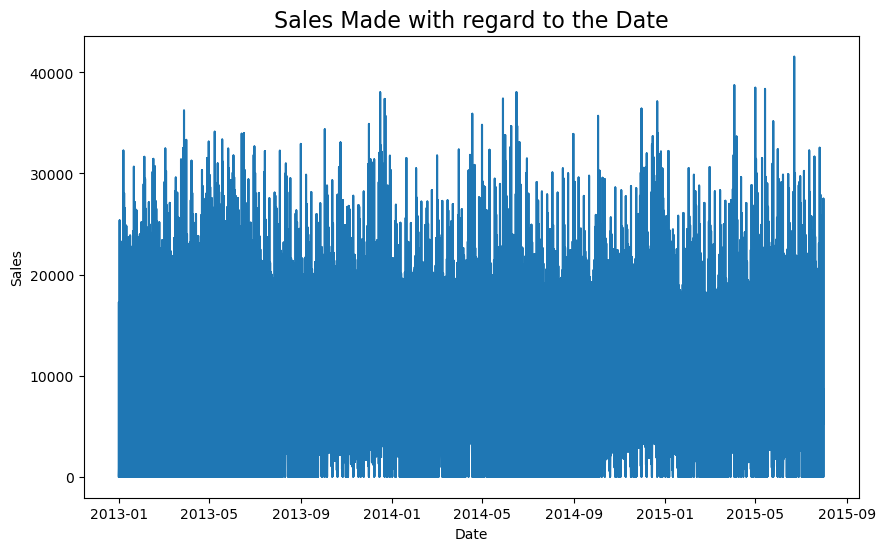

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(merged_train['Date'], merged_train['Sales'])
plt.title("Sales Made with regard to the Date", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [15]:
# Sorting the dataframe by date
merged_train = merged_train.sort_values(by='Date')

In [16]:
merged_train = merged_train.set_index('Date', inplace = False)
merged_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,d,c,...,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1
2013-01-01,379,2,0,0,0,0,a,1,d,a,...,0.0,0.0,0,0.0,0.0,0,2013,1,1,1
2013-01-01,378,2,0,0,0,0,a,1,a,c,...,8.0,2012.0,0,0.0,0.0,0,2013,1,1,1
2013-01-01,377,2,0,0,0,0,a,1,a,c,...,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov",2013,1,1,1
2013-01-01,376,2,0,0,0,0,a,1,a,a,...,8.0,2012.0,0,0.0,0.0,0,2013,1,1,1


### We need to convert categorical data into numerical values

In [17]:
# We are using Label Encoding method

from sklearn.preprocessing import LabelEncoder

lb =LabelEncoder()
merged_train['StoreType'] = lb.fit_transform(merged_train['StoreType'])
merged_train['Assortment'] = lb.fit_transform(merged_train['Assortment'])

In [18]:
merged_train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,3,2,...,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",2013,1,1,1
2013-01-01,379,2,0,0,0,0,a,1,3,0,...,0.0,0.0,0,0.0,0.0,0,2013,1,1,1
2013-01-01,378,2,0,0,0,0,a,1,0,2,...,8.0,2012.0,0,0.0,0.0,0,2013,1,1,1
2013-01-01,377,2,0,0,0,0,a,1,0,2,...,6.0,2010.0,1,18.0,2010.0,"Feb,May,Aug,Nov",2013,1,1,1
2013-01-01,376,2,0,0,0,0,a,1,0,0,...,8.0,2012.0,0,0.0,0.0,0,2013,1,1,1


In [19]:
# Columns that will be used for modelling

columns = ['Sales','Store','DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Day', 'WeekOfYear', 'Month', 'Year', 'StoreType', 
           'Assortment', 'CompetitionDistance', 'Promo2']

feature_columns = ['Store','DayOfWeek', 'Open', 'Promo', 'SchoolHoliday', 'Day', 'WeekOfYear', 'Month', 'Year', 'StoreType', 
                   'Assortment', 'CompetitionDistance', 'Promo2']

sample_size = 100000
featured_df = (merged_train[columns].sample(sample_size)).sort_values(by ='Date')

In [20]:
# Separate the Train and Test df
train_df1 = featured_df[feature_columns]
train_df2 = featured_df[['Sales']]
train_df1.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Day,WeekOfYear,Month,Year,StoreType,Assortment,CompetitionDistance,Promo2
Date,,,,,,,,,,,,,
2013-01-01,124,2,0,0,1,1,1,1,2013,0,0,1410.0,0
2013-01-01,902,2,0,0,1,1,1,1,2013,0,0,310.0,1
2013-01-01,701,2,0,0,1,1,1,1,2013,3,0,1450.0,1
2013-01-01,789,2,0,0,1,1,1,1,2013,0,2,9770.0,0
2013-01-01,196,2,0,0,1,1,1,1,2013,2,0,3850.0,1


In [21]:
train_df2.head()

,Sales
Date,
2013-01-01,0
2013-01-01,0
2013-01-01,0
2013-01-01,0
2013-01-01,0


In [22]:
#Creating train_data for Deep Learning
#train_dataset = merged_train[columns].sort_values(by='Date')
#train_dataset.head()
#csv_file_path = 'cleaned_train.csv'
# Save the DataFrame to a CSV file
#train_dataset.to_csv(csv_file_path, index=False)

In [23]:
# Get sales date array
timesteps = train_df1.index.to_numpy()
sales =train_df2['Sales'].to_numpy()
timesteps[:10],sales[:10]

(array(['2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
        '2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
        '2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
        '2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
        '2013-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))

In [24]:
# Create train and test splits the right way for time series data
from sklearn.model_selection import train_test_split
 
split_size = int(0.8 * len(sales)) # 80% for training, 20% for testing

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], sales[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], sales[split_size:]

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80000, 20000, 80000, 20000)

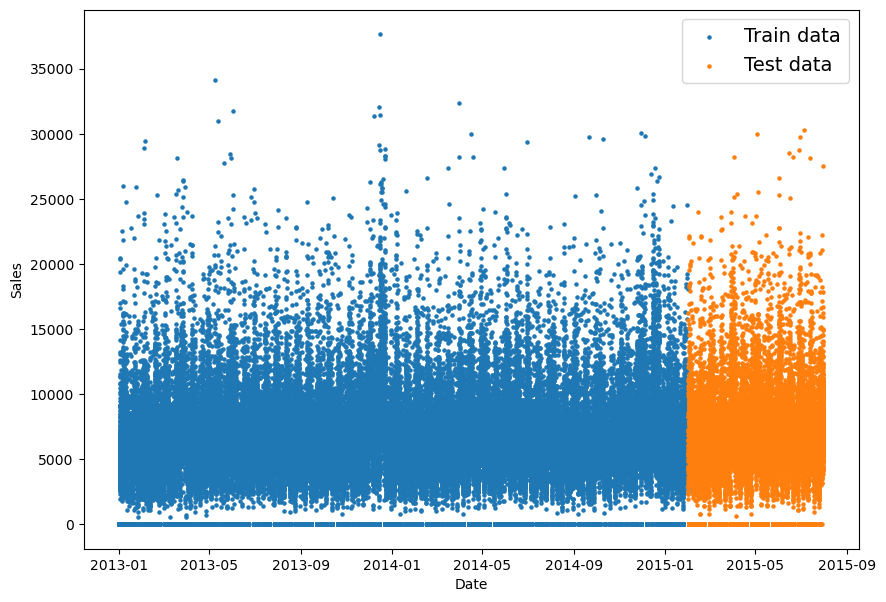

In [26]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(fontsize=14)
plt.show()

### Create Train and Test set for our data in such a way that our test set to be in the future with respect to the training set

In [27]:
timesteps = train_df1.to_numpy()
sales =train_df2.to_numpy()

In [28]:
# Create train and test splits the right way for time series data

split_size = int(0.8 * len(sales)) # 80% for training, 20% for testing

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], sales[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], sales[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(80000, 20000, 80000, 20000)

### At this point, all our features are numeric. Since our problem is a regression problem, A reasonable starting point will be to use any of the tree based algorithms. Random forests Regressor will make for a good start.

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [30]:
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=25, random_state=0)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, random_state=0)

In [31]:
score = rf_regressor.score(X_test, y_test)
print(f"Prediction Score of the Model is {round(score * 100, 2)}%")

Prediction Score of the Model is 90.08%


#### The Prediction score of the Model is good when we used Random Forest Regressor.

In [32]:
# Now we use MinMaxScaler 

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

# X = x_scaler.fit_transform(train_x)
X = X_train
Y = y_scaler.fit_transform(y_train)

## 2.2 - Building models with sklearn pipelines

In [33]:
from sklearn.pipeline import Pipeline

In [34]:
rfr = Pipeline(steps=[
    ('scaler1', MinMaxScaler()),
    ('rfr_regression', RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0))
])

lr = Pipeline(steps=[
    ('scaler2', MinMaxScaler()),
    ('lr_regression', LinearRegression())
])

dt = Pipeline(steps=[
    ('scaler3', MinMaxScaler()),
    ('dt_regression', DecisionTreeRegressor(random_state=0))
])

### Create a pipeline where the data is first scaled before model training


In [35]:
rfr.fit(X_train, y_train)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)

Pipeline(steps=[('scaler3', MinMaxScaler()),
                ('dt_regression', DecisionTreeRegressor(random_state=0))])

In [36]:
rfr_score = rfr.score(X_test, y_test)
lr_score = lr.score(X_test, y_test)
dt_score = dt.score(X_test, y_test)

print(f"RandomForestRegression prediction score is {round(rfr_score * 100, 2)}%")
print(f"LinearRegression prediction score is {round(lr_score * 100, 2)}%")
print(f"DecisionTree prediction score is {round(dt_score * 100, 2)}%")

RandomForestRegression prediction score is 57.84%
LinearRegression prediction score is 56.56%
DecisionTree prediction score is 82.11%


## 2.3 - Choose a loss function

In [37]:
# We need to crete evaluation matrics for comaparison of above performance score of models
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

In [38]:
rfr_prediction = rfr.predict(X_test)
lr_prediction = lr.predict(X_test)
dt_prediction = dt.predict(X_test)

rfr_rmse, rfr_mae, _ = eval_metrics(y_test, rfr_prediction)
lr_rmse, lr_mae, _ = eval_metrics(y_test, lr_prediction)
dt_rmse, dt_mae, _ = eval_metrics(y_test, dt_prediction)

print(f"RandomForest Mean Square Loss : {rfr_rmse}")
print(f"Linear Mean Square Loss : {lr_rmse}")
print(f"DecisionTree Mean Square Loss : {dt_rmse }")

RandomForest Mean Square Loss : 2504.1887312512504
Linear Mean Square Loss : 2541.8572292524796
DecisionTree Mean Square Loss : 1631.356652835302


### Chossing Mean Square Error as my Loss function

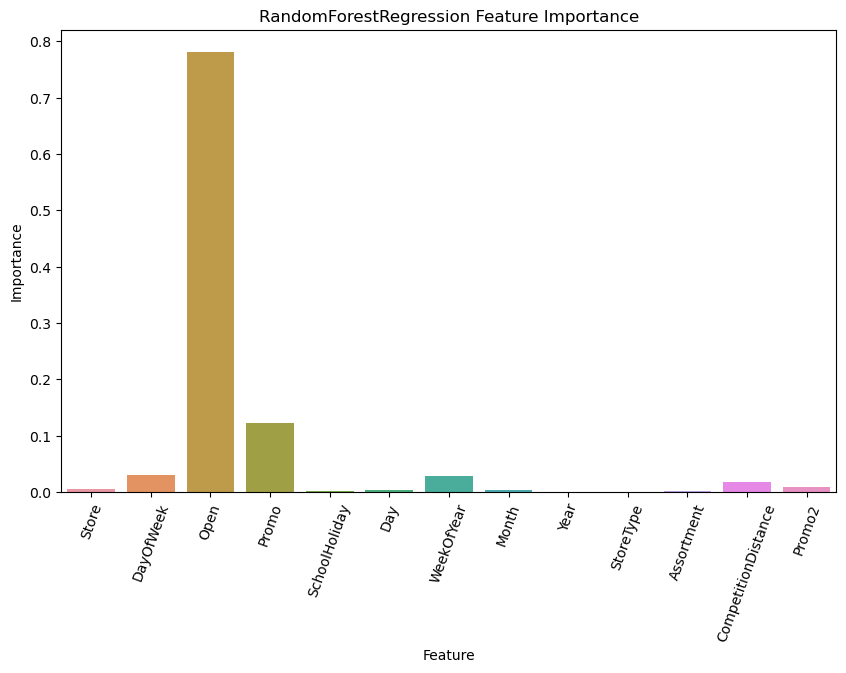

In [39]:
important_features = rfr[1].feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_columns, y=important_features)
plt.title('RandomForestRegression Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation='70')
plt.show()

## 2.4 Post Prediction analysis

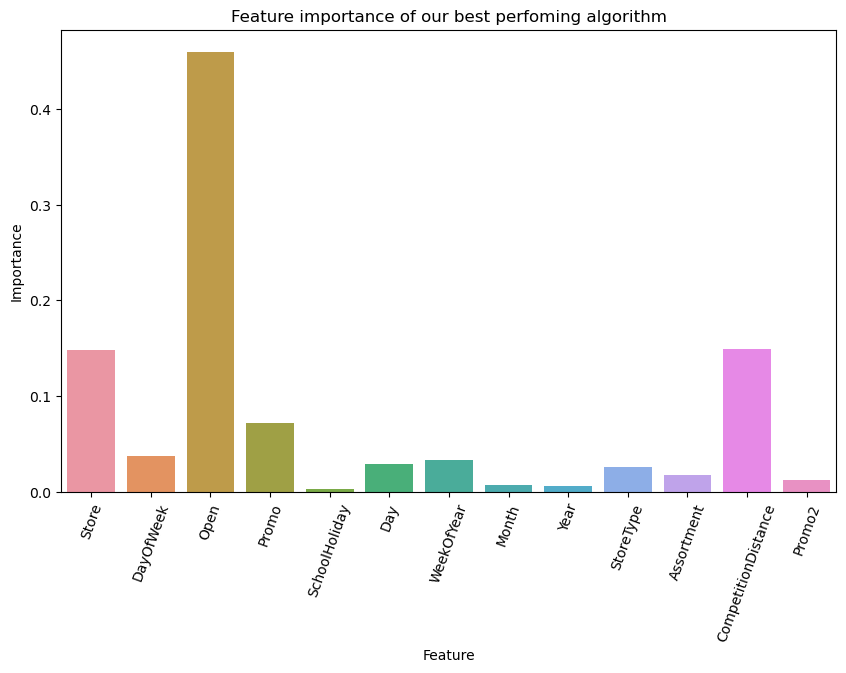

In [40]:
important_features = dt[1].feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_columns, y=important_features)
plt.title('Feature importance of our best perfoming algorithm')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation='70')
plt.show()

## 2.5 Serialize models

In [45]:
import pickle
from datetime import datetime

reg_model_file_name = f'reg-{datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}.pkl'
lr_model_file_name = f'lt-{datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}.pkl'
dt_model_file_name = f'dt-{datetime.now().strftime("%Y-%m-%d-%H:%M:%S")}.pkl'

files_path = [reg_model_file_name, lr_model_file_name, dt_model_file_name]
models = [rfr, lr, dt]

print(dt_model_file_name)
print(lr_model_file_name)
print(reg_model_file_name)

dt-2023-08-26-20:30:04.pkl
lt-2023-08-26-20:30:04.pkl
reg-2023-08-26-20:30:04.pkl


In [47]:
from config import Config
models_path = Config.MODELS_PATH
print(models_path)

..\models


In [48]:
path = models_path / "dt-2023-08-26-20:30:04.pkl"
path

WindowsPath('../models/dt-2023-08-26-20:30:04.pkl')

In [57]:
# Dump decision tree because it has better accuracy
import os

model_dir = '../models/'
model_path = os.path.join(model_dir, datetime.now().strftime("%Y-%m-%d-%H-%M-%S") + '-dt.pkl')

# Create the models directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the Decision Tree model using pickle
with open(model_path, 'wb') as model_file:
    pickle.dump(dt, model_file)

print(f"Decision Tree model saved at {model_path}")


Decision Tree model saved at ../models/2023-08-26-20-49-40-dt.pkl


### Serialization done for easy tracking of prediction which have good score